In [1]:
import pandas as pd
import numpy as np
sd = pd.read_csv('Smoking Data_4.csv')

In [2]:
sd.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [3]:
sd.shape

(1338, 6)

In [4]:
sd.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
for cl in sd.columns:
    if sd[cl].dtype == np.number:
        continue
    sd[cl] = le.fit_transform(sd[cl])

<ipython-input-6-417f9db1e626>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if sd[cl].dtype == np.number:


In [7]:
sd.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,27.900,0,1
1,2,0,1,33.770,1,0
2,2,10,1,33.000,3,0
3,1,15,1,22.705,0,0
4,1,14,1,28.880,0,0


In [8]:
x = sd.drop(['smoker'], axis=1)
y = sd['smoker']

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y, train_size=0.70, random_state=1)

In [10]:
xtrain.shape

(936, 5)

In [11]:
xtest.shape

(402, 5)

In [12]:
sd['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='smoker', ylabel='count'>

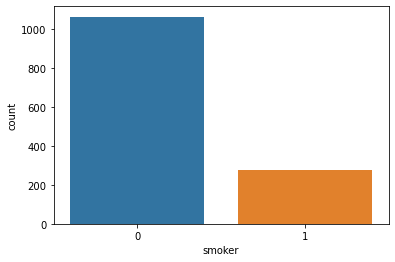

In [14]:
sns.countplot(x=sd['smoker'])

<AxesSubplot:xlabel='count', ylabel='smoker'>

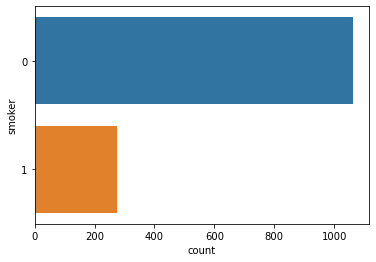

In [15]:
sns.countplot(y=sd['smoker'])

<AxesSubplot:xlabel='sex', ylabel='count'>

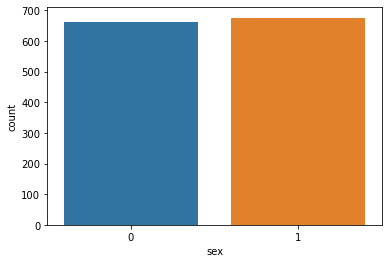

In [16]:
sns.countplot(x='sex',data=sd)

<AxesSubplot:xlabel='sex', ylabel='count'>

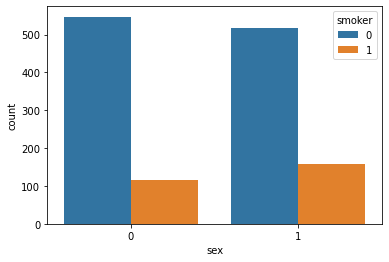

In [17]:
sns.countplot(x='sex',data=sd, hue='smoker')

In [18]:
sd['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

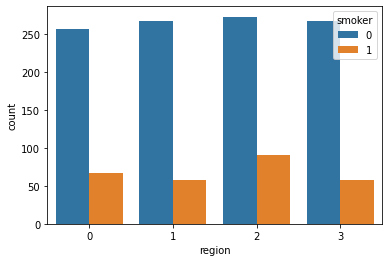

In [19]:
sns.countplot(x='region',data=sd, hue='smoker')

In [20]:
sd['region'].value_counts()

2    364
1    325
3    325
0    324
Name: region, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

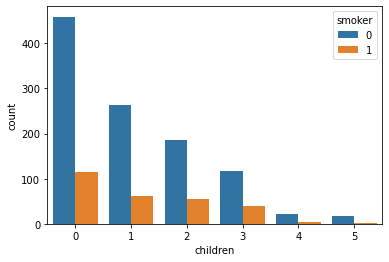

In [21]:
sns.countplot(x='children',data=sd, hue='smoker')

In [22]:
sd['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [23]:
sd.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,27.900,0,1
1,2,0,1,33.770,1,0
2,2,10,1,33.000,3,0
3,1,15,1,22.705,0,0
4,1,14,1,28.880,0,0


In [24]:
xtrain.head()

,region,age,sex,bmi,children
744,1,32,1,26.41,0
363,3,3,0,26.40,1
10,0,7,1,26.22,0
970,2,32,0,28.16,3
634,3,33,1,39.70,1


In [25]:
ytrain.head()

744    0
363    0
10     0
970    0
634    0
Name: smoker, dtype: int32

In [26]:
ytrain.value_counts()

0    743
1    193
Name: smoker, dtype: int64

In [27]:
220/(850+220)

0.205607476635514

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
testing = dtc.predict(xtest)

In [32]:
pd.Series(testing)

0      1
1      1
2      0
3      1
4      0
      ..
397    0
398    0
399    0
400    0
401    0
Length: 402, dtype: int32

In [33]:
pd.Series(ytest)

559     0
1087    0
1020    0
460     0
802     0
       ..
323     0
1268    0
134     0
1274    1
876     0
Name: smoker, Length: 402, dtype: int32

In [34]:
'''
pred = pd.Series(testing)
actual = pd.Series(ytest)
xtest['Predicted'] = pred
xtest['Actual'] = actual
'''


"\npred = pd.Series(testing)\nactual = pd.Series(ytest)\nxtest['Predicted'] = pred\nxtest['Actual'] = actual\n"

In [35]:
sd.head()

,region,age,sex,bmi,children,smoker
0,3,1,0,27.900,0,1
1,2,0,1,33.770,1,0
2,2,10,1,33.000,3,0
3,1,15,1,22.705,0,0
4,1,14,1,28.880,0,0


In [36]:
dtc.score(xtest,ytest)

0.6616915422885572

In [37]:
from sklearn.metrics import classification_report , confusion_matrix, roc_curve, plot_roc_curve

In [38]:
classification_report(ytest, testing)

'              precision    recall  f1-score   support\n\n           0       0.80      0.78      0.79       321\n           1       0.19      0.21      0.20        81\n\n    accuracy                           0.66       402\n   macro avg       0.49      0.49      0.49       402\nweighted avg       0.67      0.66      0.67       402\n'

In [39]:
print(classification_report(ytest, testing))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       321
           1       0.19      0.21      0.20        81

    accuracy                           0.66       402
   macro avg       0.49      0.49      0.49       402
weighted avg       0.67      0.66      0.67       402



In [40]:
xtest.shape

(402, 5)

In [41]:
321+81

402

In [42]:
confusion_matrix(ytest, testing)

array([[249,  72],
       [ 64,  17]], dtype=int64)

In [43]:
(251+15)/(251+70+66+15)

0.6616915422885572

In [44]:
con_m = confusion_matrix(ytest, testing)

<AxesSubplot:>

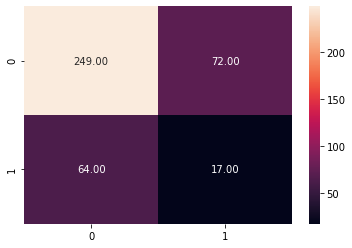

In [45]:
sns.heatmap(con_m, annot=True, fmt='0.2f')

In [46]:
tp,fn,fp,tn=con_m.reshape(-1)

In [47]:
tp

249

In [48]:
fn

72

In [49]:
fp

64

In [50]:
tn

17

In [51]:
# Accuracy Check
acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.6616915422885572

In [52]:
# Precision or Positive Predictive Value Check(ppv)
ppv = tp/(tp+fp)
ppv

0.7955271565495208

In [53]:
# Negative Predictive Value Check(npv)
npv = tn/(fn+tn)
npv 

0.19101123595505617

In [54]:
# Sensitivity, Recall, Hit Rate, or True Positive Rate(tpr)
tpr = tp/(tp+fn)
tpr

0.7757009345794392

In [55]:
# False Positive Rate(fpr)
fpr = fp/(fp+tn)
fpr

0.7901234567901234

In [56]:
#F1 Measure(fm)
fm = (ppv+tpr)/2
fm

0.78561404556448

In [57]:
#Harmonic Mean, F1 Score (f1s)
f1s = (2*ppv*tpr)/(ppv+tpr)
f1s

0.7854889589905364

In [58]:
# Specificity, Selectivity or True Negative Rate(tnr)
tnr = tn/(tn+fp)
tnr

0.20987654320987653

In [59]:
#Threat Score(TS) or Critical Success Index(CSI)
csi=tp/(tp+fn+fp)
csi

0.6467532467532467

In [60]:
# False Discovery Rate(fdr)
fdr = fp/(tp+fp)

In [61]:
# Balance Accurracy (ba)
ba = (tpr+tnr)/2
ba

0.4927887388946579

In [62]:
# informedness or bookmaker informedness (bm)
bm = tpr + tnr -1
bm

-0.014422522210684185

In [63]:
# markedness (mk) or deltaP(mk)
mk = ppv + npv -1
mk

-0.013461607495423022

In [64]:
# Matthews correlation co-efficient(MCC)
mcc = ((tp+tn)-(fp*fn))/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**(1/2)
mcc

-0.16133463890191171

In [65]:
#Fowlkes-Mallows index (FM)
fm = ((tp/(tp+fp))*(tp/(tp+fn)))**(1/2) 
fm

0.7855514997877524

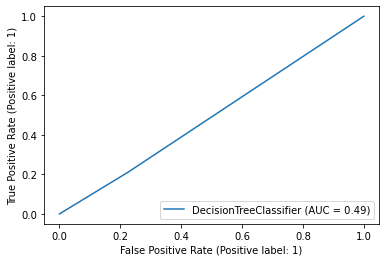

In [66]:
plot_roc_curve(dtc, xtest, ytest)

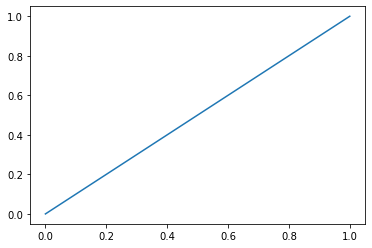

In [67]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1])

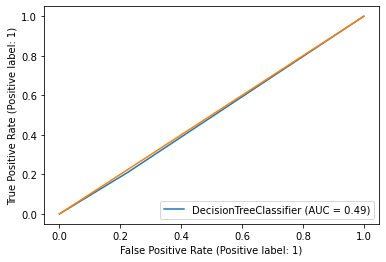

In [68]:
import matplotlib.pyplot as plt
plot_roc_curve(dtc, xtest, ytest)
plt.plot([0,1],[0,1])